In [2]:
import rasterio
import scipy.interpolate as interpolate
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = "./data/rasters/new/SikSik_Snow.tif"
src = rasterio.open(path)

In [4]:
snow_depths = src.read()
snow_depths = snow_depths[0]
snow_depths = snow_depths[snow_depths > 0]
snow_max = np.round(snow_depths.max()+0.5)
snow_min = 0.1
snow_step = 0.01

In [5]:
bsnow = np.arange(snow_min,snow_max,snow_step)
n_samples = 200
hist, bin_edges = np.histogram(snow_depths, bins=bsnow, density=True)
cum_values = np.zeros(bin_edges.shape)
cum_values[1:] = np.cumsum(hist*np.diff(bin_edges))
inv_cdf = interpolate.interp1d(cum_values, bin_edges,  fill_value="extrapolate")
r = np.random.rand(n_samples)

In [6]:
inv_cdf(r)

array([0.5458553 , 0.41406344, 0.40399172, 0.39685067, 0.42004451,
       0.78154123, 0.55569275, 0.48301663, 0.47172031, 0.36907682,
       1.0778401 , 0.79209766, 0.82136011, 0.76759088, 0.44077547,
       0.93037218, 0.61928698, 0.67644671, 0.38836836, 0.88565923])

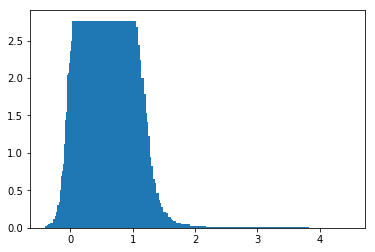

In [7]:
plt.bar(bin_edges[:-1],hist,width=1)

plt.show()

(array([6., 3., 2., 1., 1., 3., 1., 2., 0., 1.]),
 array([0.36907682, 0.43995315, 0.51082948, 0.58170581, 0.65258213,
        0.72345846, 0.79433479, 0.86521112, 0.93608745, 1.00696377,
        1.0778401 ]),
 <a list of 10 Patch objects>)

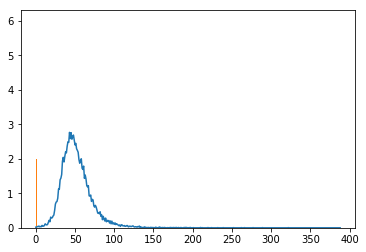

In [10]:
samps= inv_cdf(r)
plt.plot(hist)
plt.hist(samps)

(array([6., 3., 2., 1., 1., 3., 1., 2., 0., 1.]),
 array([0.36907682, 0.43995315, 0.51082948, 0.58170581, 0.65258213,
        0.72345846, 0.79433479, 0.86521112, 0.93608745, 1.00696377,
        1.0778401 ]),
 <a list of 10 Patch objects>)

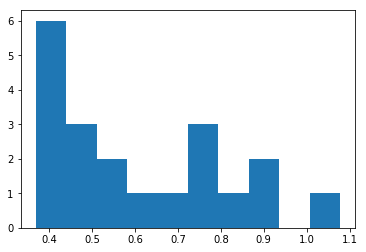

In [11]:
plt.hist(samps)